# Практика к 5 занятию по DS_Sber_Reboot
### Преподаватель - Алексей Зуев

Импортируем библиотеки

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
from pylab import rcParams

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

#### Взял распределение - anglit

### Сгенерируйте примеры из распределения

In [3]:
# Создаем 100 величин из выбранного распределения для эксперимента
anglit_rv = sts.anglit()
sample = anglit_rv.rvs(100)
sample

array([-3.42284093e-01,  4.52420146e-01,  6.62856601e-01,  2.35182880e-01,
       -2.87651272e-01, -8.54133980e-05,  3.25695729e-01, -2.32211002e-01,
       -5.76835652e-02,  5.00693038e-01, -3.09776401e-01, -3.17101112e-01,
       -4.32043467e-01,  1.01539644e-01, -5.33620652e-01,  1.11155159e-01,
        1.46841797e-01,  2.60326931e-01,  2.37598767e-01, -1.83746257e-01,
       -2.33583338e-01,  3.14097783e-01,  5.69510987e-01, -3.31360720e-01,
       -3.20671780e-01,  3.55927451e-01,  3.13634243e-01, -5.44656648e-01,
        4.23396751e-01,  3.90215489e-01, -1.34796214e-01, -5.31972501e-01,
        2.23347975e-01,  2.24110186e-01,  2.82630966e-02, -3.89640357e-01,
       -6.14612204e-01, -1.94654139e-01,  3.09049616e-01, -2.73554264e-01,
       -4.47400672e-01,  6.81781594e-01, -4.14242018e-02,  1.28141762e-01,
       -5.99921793e-01, -3.11268242e-01,  2.62093544e-01, -8.09519232e-02,
        2.97187163e-01,  4.44750851e-01,  4.94483702e-04, -2.04203390e-01,
        3.00792247e-01,  

(array([ 3.,  8., 18., 11.,  8., 13., 18., 13.,  5.,  3.]),
 array([-0.69329483, -0.55578718, -0.41827954, -0.2807719 , -0.14326426,
        -0.00575662,  0.13175103,  0.26925867,  0.40676631,  0.54427395,
         0.68178159]),
 <a list of 10 Patch objects>)

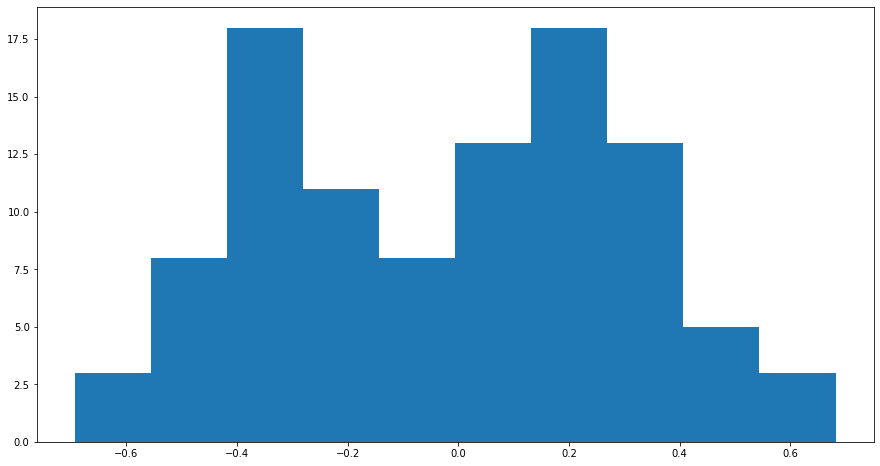

In [15]:
# Визуализируем и определяем с чем имеем дело
plt.hist(sample)

In [16]:
# проверяем тип данных
sample.dtype

dtype('float64')

In [6]:
# Рассчитываем метрики
real_mean = anglit_rv.mean() # настоящее среднее случайной величины
real_mean

0.0

In [7]:
# Рассчитываем метрики
real_var = anglit_rv.var() # настоящая дисперсия случайной величины
real_var

0.11685027506808487

### Постройте гистограмму выборки и теоретическую плотность распределения

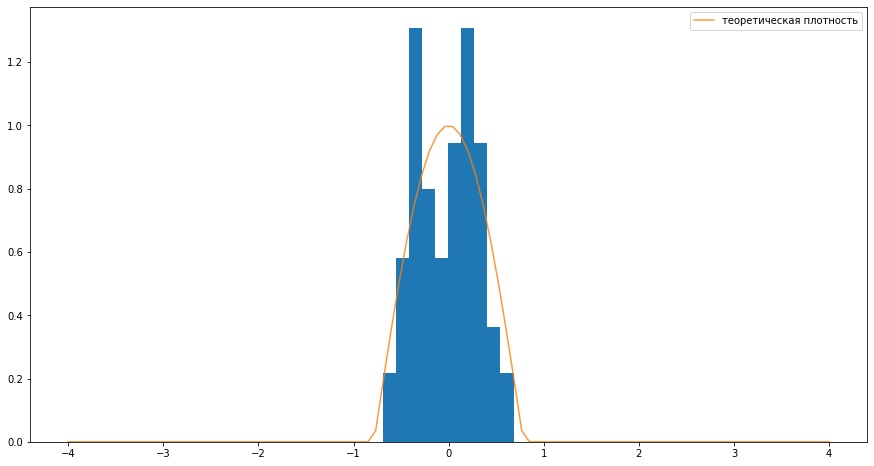

In [9]:
# Визуализируем выбранное распределение с наложение нормального распределения
rcParams['figure.figsize'] = 15,8
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = anglit_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.8)
plt.legend()

In [18]:
# Рассчитываем метрики 
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.020703884773677766
0.10411252737981817


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

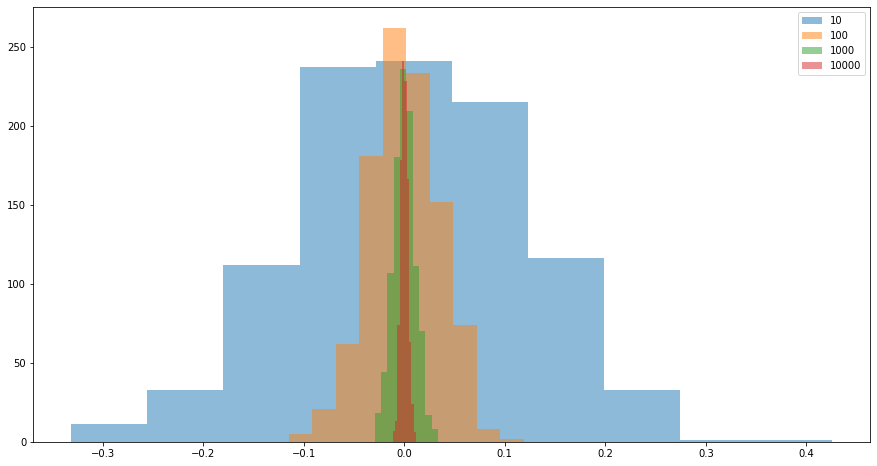

In [11]:
# Визуализируем
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(anglit_rv.rvs(N)))
    plt.hist(means, alpha=0.5)
    
plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

### На мой взгляд выборочная средняя и реальная дисперсия различаются в среднем на 0,02, что является погрешностью, учёт или не учёт которой зависит от решаемой задачи. 

#### В текущей задаче влияние отклонения считаем не критичным. Визуально на графике разницы практически нет. При этом графики исходного распределения и трансформированного отличаются. В финале мы получили нормальное распределение.

#### Демонстрация сравниваемых величин
* настоящее среднее случайной величины = 0.0
* выборочное среднее = -0,2

* настоящая дисперсия случайной величины = 0.12
* выборочная дисперсия = 0,10

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [19]:
# Загружаем данные
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df.head(5))

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
# Проверяем уникальность номеров телефонов в сэмпле данных
df['phone number'].nunique()

3333

In [21]:
# Оставляем 2 столбца из всей таблицы, с которыми будем работать
df_1 = df[['total day calls', 'churn']]
df_1.head()

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False


In [23]:
# Смотрим статистики фрейма данных
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   total day calls  3333 non-null   int64
 1   churn            3333 non-null   bool 
dtypes: bool(1), int64(1)
memory usage: 29.4 KB


In [26]:
# Определяем среднее значение столбца 
df_1.describe()
# Результат = 100

,total day calls
count,3333.000000
mean,100.435644
std,20.069084
min,0.000000
25%,87.000000
50%,101.000000
75%,114.000000
max,165.000000


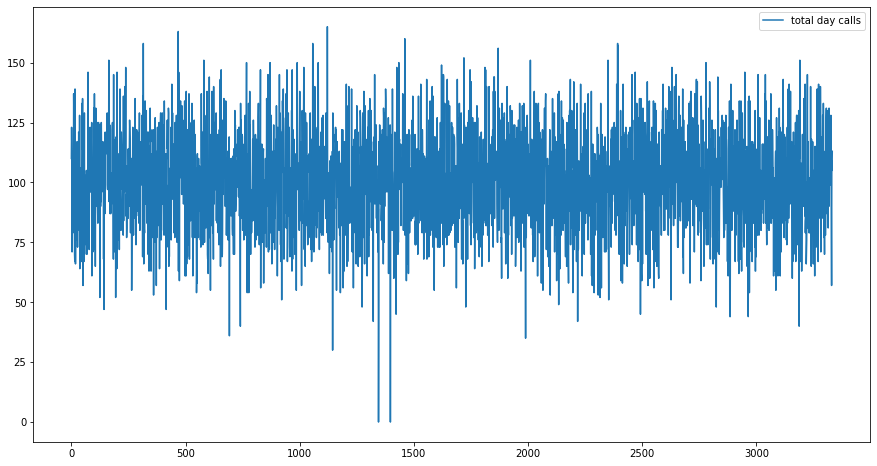

In [46]:
# Посмотрим как это выглядит визуально
rcParams['figure.figsize'] = 15,8
df_1.plot()

### Задания

* Постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел)
* Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).
* Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

### <font color='green'>Работаем с теми кто остался</font>

In [63]:
# df_used - те кто остался в телеком компании
df_used = df_1.query("churn == False")
df_used.head(3)

,total day calls,churn
0,110,False
1,123,False
2,114,False


In [95]:
# Проверяем уникальные значения в столбце с оттоком
df_used['churn'].nunique()

1

In [64]:
# Смотрим статистики по срезу
df_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850 entries, 0 to 3332
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   total day calls  2850 non-null   int64
 1   churn            2850 non-null   bool 
dtypes: bool(1), int64(1)
memory usage: 47.3 KB


In [67]:
# Считаем статистики по срезу
df_used.describe()

,total day calls
count,2850.000000
mean,100.283158
std,19.801157
min,0.000000
25%,87.000000
50%,100.000000
75%,114.000000
max,163.000000


In [71]:
# Оставим только 1 столбец
df_used_2 = df_used['total day calls']
df_used_2

0       110
1       123
2       114
3        71
4       113
       ... 
3328     77
3329     57
3330    109
3331    105
3332    113
Name: total day calls, Length: 2850, dtype: int64

In [73]:
# Считаем статистики по срезу
df_used_2.var()

392.08581663003537

In [74]:
# Считаем статистики по срезу
df_used_2.mean()

100.28315789473685

In [75]:
# Считаем статистики по срезу
df_used_2.std()

19.801156951805503

In [84]:
# Импортируем нужные библиотеки для реализации следующей ячейки
from statsmodels.stats.weightstats import _zconfint_generic
import statsmodels.stats.weightstats as ssw

In [86]:
print("Задание 1. Доверительный интервал по цпт: [{}, {}] ".format(
    np.mean(df_used_2) - 1.96 * df_used_2.std() / np.sqrt(N-1), np.mean(df_used_2) + 1.96 * df_used_2.std() / np.sqrt(N-1) 
))

print("Задание 2. Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(df_used_2), 
                      scale=np.std(df_used_2, ddof=1)/np.sqrt(N-1))
))

print("Задание 3. Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(df_used_2),  np.std(df_used_2, ddof=1), alpha=0.95, alternative='two-sided')
))

Задание 1. Доверительный интервал по цпт: [99.89503581189214, 100.67127997758155] 
Задание 2. Доверительный интервал для среднего по цпт интервальная оценка: (99.8950429437265, 100.6712728457472) 
Задание 3. Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 


### Итог по тем кто остался в компании клиентом с точки зрения статистик

* Среднее значение df_used_2.mean() = 100,3 при всех проверках из ячейки выше является центральным значением, т.е. доверительные интервал посчитан хорошо

### <font color='red'>Работаем с теми кто ушел</font>

In [65]:
# df_used - те кто ушел от телеком компании
df_out = df_1.query("churn == True")
df_out.head(3)

,total day calls,churn
10,137,True
15,67,True
21,89,True


In [94]:
# Проверяем уникальные значения в столбце с оттоком
df_out['churn'].nunique()

1

In [66]:
# Смотрим статистики по срезу
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 10 to 3323
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   total day calls  483 non-null    int64
 1   churn            483 non-null    bool 
dtypes: bool(1), int64(1)
memory usage: 8.0 KB


In [87]:
# Считаем статистики по срезу
df_out.describe()

,total day calls
count,483.000000
mean,101.335404
std,21.582307
min,0.000000
25%,87.500000
50%,103.000000
75%,116.500000
max,165.000000


In [88]:
# Оставим только 1 столбец
df_out_2 = df_out['total day calls']
df_out_2

10      137
15       67
21       89
33      118
41       85
       ... 
3301    113
3304    114
3320    101
3322    105
3323    126
Name: total day calls, Length: 483, dtype: int64

In [89]:
# Считаем статистики по срезу
df_out_2.var()

465.79598463957115

In [90]:
# Считаем статистики по срезу
df_out_2.mean()

101.33540372670808

In [92]:
# Считаем статистики по срезу
df_out_2.std()

21.58230721307551

In [93]:
print("Задание 1. Доверительный интервал по цпт: [{}, {}] ".format(
    np.mean(df_out_2) - 1.96 * df_out_2.std() / np.sqrt(N-1), np.mean(df_out_2) + 1.96 * df_out_2.std() / np.sqrt(N-1) 
))

print("Задание 2. Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(df_out_2), 
                      scale=np.std(df_out_2, ddof=1)/np.sqrt(N-1))
))

print("Задание 3. Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(df_out_2),  np.std(df_out_2, ddof=1), alpha=0.95, alternative='two-sided')
))

Задание 1. Доверительный интервал по цпт: [100.9123693530843, 101.75843810033186] 
Задание 2. Доверительный интервал для среднего по цпт интервальная оценка: (100.91237712644019, 101.75843032697597) 
Задание 3. Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


### Итог по тем кто ушел от компании с точки зрения статистик

* Среднее значение df_out_2.mean() = 101,3 при всех проверках из ячейки выше является центральным значением, т.е. доверительные интервал посчитан хорошо

## <font color='Blue'>Средние значения по атрибуту 'Всего звонков в день' у оттекших и оставшихся имеют незначительную разницу</font>

* Дисперсии 2 этих когорт заметно различаются
    df_used - оставшиеся = 392,1 ед.
    df_out - ушедшие = 465,7 ед.
    Разница - 73,6